# Trial Notebook for Notebook_LEDET_V2

In [1]:
import sys
!{sys.executable} -m pip install --user --upgrade -i https://test.pypi.org/simple/ steam-nb-api
    
%matplotlib notebook
from steam_nb_api.ledet.NotebookLEDET_V2 import Notebook_LEDET
%load_ext autoreload
%autoreload 2

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 296kB 6.2MB/s eta 0:00:01
  Found existing installation: steam-nb-api 0.3.136
    Uninstalling steam-nb-api-0.3.136:
      Successfully uninstalled steam-nb-api-0.3.136


# Global variables, Magnet geometry, Field maps, strand positions etc.

In [2]:
nameMagnet = 'MQXF_V2'
new_notebook = Notebook_LEDET(nameMagnet)

Initializing  MQXF_V2
O - Loading magnet data from:  MQXF_V2_All_WithIron_WithSelfField.data
O - Loading field maps from:  MQXF_V2_All_WithIron_WithSelfField.map2d

X - Loading ROXIE was successful.


# Overall magnet variables & Definition of group of conductors

In [3]:
T00 = 4.5
l_magnet = 9.45
# Current to be simulated
I00 = 5800

### The 2 following arguments need to be set, as they are required by functions
# Arguments can always be set with new_notebook.setAttribute(Attribute, value)
# If you want to load all variables into the object, use new_notebook.storeVariables(locals())
new_notebook.setAttribute('GroupToCoilSection', new_notebook.nGroups * [1])
new_notebook.setAttribute('I00', I00)

# Conductor properties

In [4]:
# New conductors first need a new yaml + need to be entered in the package --> thinking about a unified database
new_notebook.load_ConductorData(['Type2','Type3'],[1,2]*int(new_notebook.nGroups/2)) 
new_notebook.setHeliumFraction(2) #Percentage

O - Loading Conductor data for Type:  Type2
O - Loading Conductor data for Type:  Type3
X - Loading Conductor data was successful.
O - Calculate Self-mutual inductance matrix.
Self-mutual inductance between strands - Calculation started
Calculation does not include correction for strand diameter.
Status: [------------------->] 100%
Self-mutual inductance between strands - Calculation finished
Self-mutual inductance between half-turns - Calculation started
Self-mutual inductance between half-turns - Calculation finished
Self-mutual inductance between turns - Calculation started
Self-mutual inductance between turns - Calculation finished
X - Calculation was successful.
O - Trying to set Helium fraction in conductor voids
Negative externalVoids calculated. Abort, please check.


# Electrical order of Half-Turns

In [5]:
elPairs_GroupTogether = [[1,17], [2,18], [3,19], [4,20], [5,21], [6,22], [7,23], [8,24], [9,25], [10,26], [11,27], [12,28], [13,29], [14,30], [15,31], [16,32]]
elPairs_RevElOrder = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
new_notebook.set_ElectricalOrder(elPairs_GroupTogether, elPairs_RevElOrder)

O - Attempting to set electrical order
X - Setting electrical order was successful.


# Cable geometry parameters

In [6]:
nHalfTurnsDefined = new_notebook.nHalfTurns
nHalfQuadrants = 8
# Inclination of cables with respect to X axis (including transformations for mirror and rotation)
alphasDEG = nHalfQuadrants * [0, 1.2404, 2.4808, 3.7212, 4.9616, 6.202, 7.4424, 8.6828, 9.9232, 0, 1.2404, 2.4808, 3.7212, 4.9616, 6.202, 7.4424, 8.6828, 9.9232, 11.1636, 12.404, 0, 1.2404, 2.4808, 3.7212, 4.9616, 6.202, 7.4424, 8.6828, 0, 1.2404, 2.4808, 3.7212 ]
# Rotate cable by a certain angle [deg]
rotation_block = int(nHalfTurnsDefined/8)*[0] + int(nHalfTurnsDefined/8)*[180] +int(nHalfTurnsDefined/8)*[0] + int(nHalfTurnsDefined/8)*[180] + int(nHalfTurnsDefined/8) * [90] + int(nHalfTurnsDefined/8) * [270] + int(nHalfTurnsDefined/8) * [90] + int(nHalfTurnsDefined/8) * [270]
# Mirror cable along the bisector of its quadrant (0=no, 1=yes)
mirror_block = int(nHalfTurnsDefined/2) * [0] + int(nHalfTurnsDefined/2) * [1]
# Mirror cable along the Y axis (0=no, 1=yes)
mirrorY_block = nHalfTurnsDefined * [0]

# Heat exchange

In [7]:
max_distance = 0.5E-3
new_notebook.set_ThermalConnections(max_distance)

O - Attempting to set thermal connections
X - Thermal connections are set.


# Electrical Circuit

In [8]:
# Resistance of the warm parts of the circuit [Ohm]
R_circuit = 7.76E-4
# Resistance of crowbar of the power supply [Ohm]
R_crowbar = 5.6E-5
# Forward voltage drop of a diode or thyristor in the crowbar of the power supply [V]
Ud_crowbar = 0.34

# Quench protection
If the respective QPS system is present, it will be set. If not, all to 0 + t=9999

## Energy Extraction

In [9]:
# Time when the energy-extraction system is triggered [s]
tEE = 99999
# Resistance of the energy-extraction system [Ohm]
R_EE_triggered = 0.066

## CLIQ system

In [10]:
# Time when the CLIQ system is triggered [s]
tCLIQ = 99999
# Direction of the introduced current change for the chosen CLIQ configuration
directionCurrentCLIQ = [1]
# Number of CLIQ units
nCLIQ = 1
# CLIQ charging voltage [V]
U0 = 1000
# Capacitance of the CLIQ capacitor bank [F]
C = 0.04
# Resistance of the CLIQ leads [Ohm]
Rcapa = 0.05

## Quench Heater

In [11]:
# Number of quench heater strips to write in the file
nHeaterStrips = 4
# Number of QH circuits
nQHcircuits = 2

# Time at which the power supply connected to the QH strip is triggered (Low-field QHs set to a very large value to avoid triggering).
tQH = nHeaterStrips * [.002]
# Charging voltage of the capacitor connected to the QH strip.
U0_QH = nHeaterStrips * [900/nQHcircuits]
# Capacitance of the capacitor connected to the QH strip.
C_QH = nHeaterStrips * [7.05E-3*nQHcircuits]
# Resistance of the warm leads of the QH strip discharge circuit.
R_warm_QH = nHeaterStrips * [0.25* nQHcircuits] # 0.25-->0.28 Ohm partially compensates the fact that the real strip is 9.646 m long instead of l_magnet=9.450 m long
# Width of the non-Cu-plated part of the the QH strip.
w_QH = nHeaterStrips * [44.45E-3]
# Height of the non-Cu-plated part of the QH strip.
h_QH = nHeaterStrips * [0.0254E-3]
# Thickness of the insulation layer between QH strip and coil insulation layer.
s_ins_QH = nHeaterStrips * [75E-6] 
# Type of material of the insulation layer between QH strip and coil insulation layer (1=G10; 2=kapton)
type_ins_QH = nHeaterStrips * [2]
# Thickness of the insulation layer between QH strip and the helium bath (or the collars); on this side, the QH strip is thermally connected to an infinite thermal sink at constant temperature.
s_ins_QH_He = nHeaterStrips * [500E-6]
# Type of material of the insulation layer between QH strip and helium bath (1=G10; 2=kapton)
type_ins_QH_He = nHeaterStrips * [2]
# Length of the QH strip.
l_QH = nHeaterStrips * [10.16]
# Fraction of QH strip covered by heating stations (not-Cu-plated).
f_QH = nHeaterStrips * [.127/(.127+.635)]

# Heat exchange between quench heater strips and half-turns
iQH_toHalfTurn_From_oneHalfQuadrant = [1,1,1,1,1,1,1,1]
iQH_toHalfTurn_To_oneHalfQuadrant = [1,2,3,4,5,6,7,8]


# Differential inductance versus current (Iron-yoke effect) - IMPORT FROM ROXIE

In [12]:
# Copy/paste the values after calculation using ROXIE or COMSOL or another software
fL_I = [0, 60.5, 511.225, 961.95, 1412.675, 1863.4, 2314.125, 2764.85, 3215.575, 3666.3, 4117.025, 4567.75, 5018.475, 5469.2, 5919.925, 6370.65, 6821.375, 7272.1, 7722.825, 8173.55, 8624.275, 9075 ]
fL_L = [1.50847185630795, 1.50847185630795, 1.50847185630795, 1.50846737882912, 1.50841522306793, 1.50830395909222, 1.50822527083526, 1.50806904802754, 1.50787422001269, 1.50745689700945, 1.50645441147256, 1.50388608565927, 1.49507688502376, 1.47034904670854, 1.4380027616657, 1.40295544163306, 1.35977890716088, 1.30439619675877, 1.23307412316907, 1.17633437683201, 1.14099904228627, 1.11820344760328 ]

# Simulation Type

In [13]:
new_notebook.set_SimulationType('2D+1D') # 2D, 3D 

O - Prepare simulation as: 2D+1D
Reading  9  Field maps. This may take a while.
Field maps: 100%|██████████| 9/9 [01:42<00:00, 11.35s/it]
X - Scenario prepared.


# Timing

In [14]:
t_PC = 0
tStart = -0.02
Transient = 'FPA' #not supported yet: SPA, trapezoidal, ....

# Time from which the adiabatic hot-spot temperature calculation starts. For each coil section, calculate the adiabatic hot-spot temperature in the highest-field strand/cable [s]
tQuench = tStart
# Initial quench temperature in the hot-spot temperature calculation [K]
initialQuenchTemp = 10

# Time Vector Definition. Parameters used to generate the time vector.
# Each triplet of numbers defines a time window: first element is the start time, second element is the time step in that window, third element is the end time. It must contain a number of elements multiple of 3. Any time point above t=1000 s will be ignored.
time_vector_params = [tStart, 5E-4, 0, 5E-4, 5E-4, 0.5, 0.501, 0.001, 1]

# Set Quench

In [15]:
new_notebook.storeVariables(locals())
new_notebook.initiateQuench([1,3,5],[-0.02, 0.2, 1]) # Turns, Time, (length), default uses MPZ for 2D+1D, 2D uses l_magnet

O - Storing variables.
X - Variables successfully loaded.
O - Attempting to initiate quench.
X - Quenches successfully initiated.


# Add Busbar inductance

In [16]:
new_notebook.includeBusbar(5000, InductanceGuessPerLength=0.8E-6) #in m (InductanceGuessPerLength) optional

O - Including busbar inductance.
X -  5000  m of busbar as additional inductance included.


# Options

In [17]:
new_notebook.load_Options('Default')
new_notebook.load_VariablesToStore('Default')
new_notebook.load_PlotOptions('Default')

O - Loading  Default options.
X - Loading  Default options was successful.
O - Loading  Default  storage options.
X - Loading  Default variables to store was successful.
O - Loading  Default  plot options.
X - Loading  Default plot-options was successful.


# Write the LEDET input file

In [18]:
nameFileLEDET = 'TEST_' + nameMagnet + '_TEST_0' + '.xlsx'
new_notebook.writeLEDETFile(nameFileLEDET, locals())

O - Storing variables.
X - Variables successfully loaded.
The variable  alphasDEG  does not have the correct size, should be [400.]  but is  256 ! Please check.
Variables are not consistent! Writing aborted -  TEST_MQXF_V2_TEST_0.xlsx


# Plotting

<IPython.core.display.Javascript object>


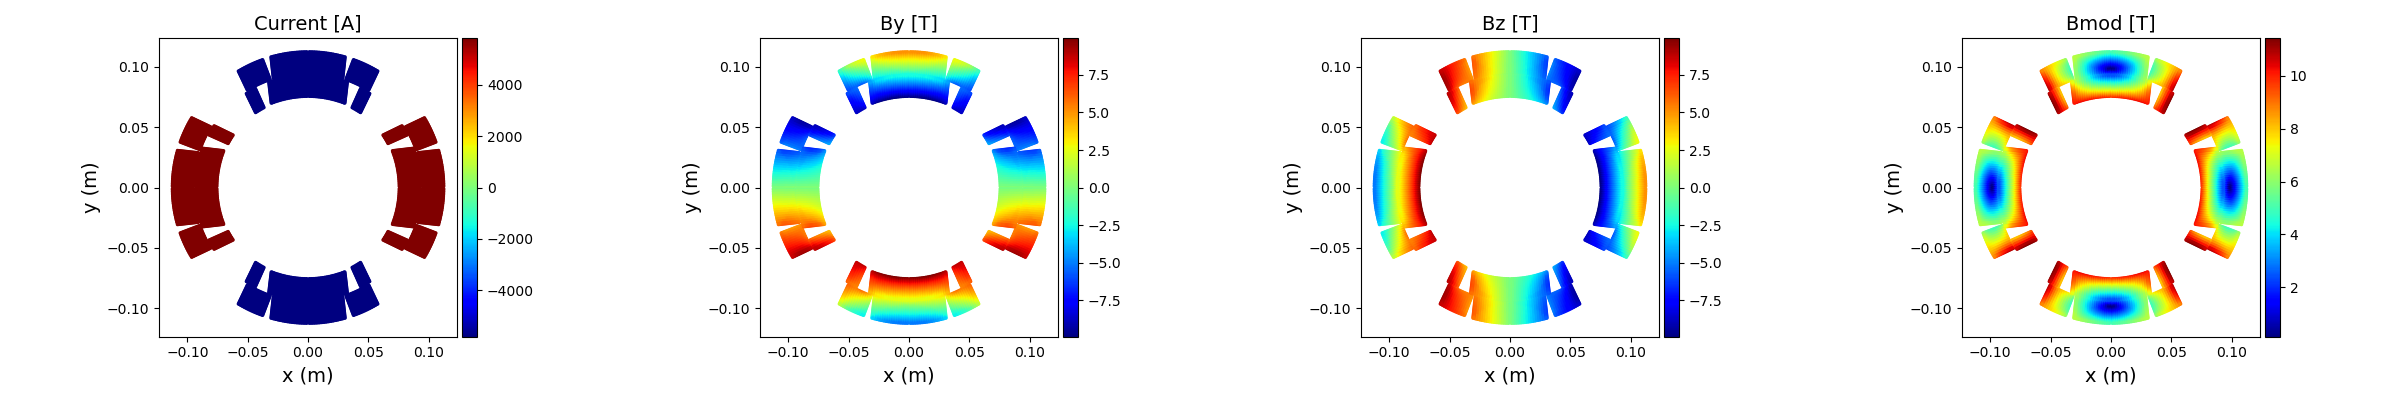

<IPython.core.display.Javascript object>


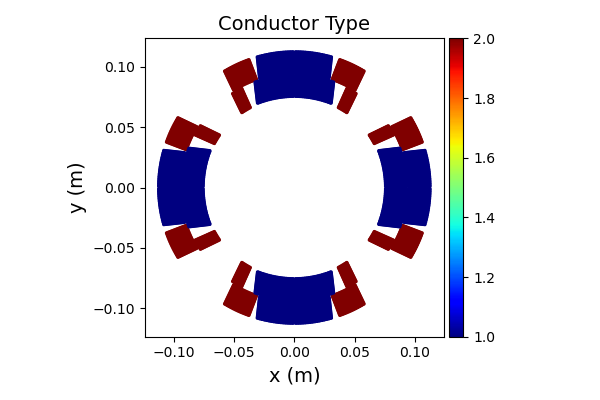

<IPython.core.display.Javascript object>


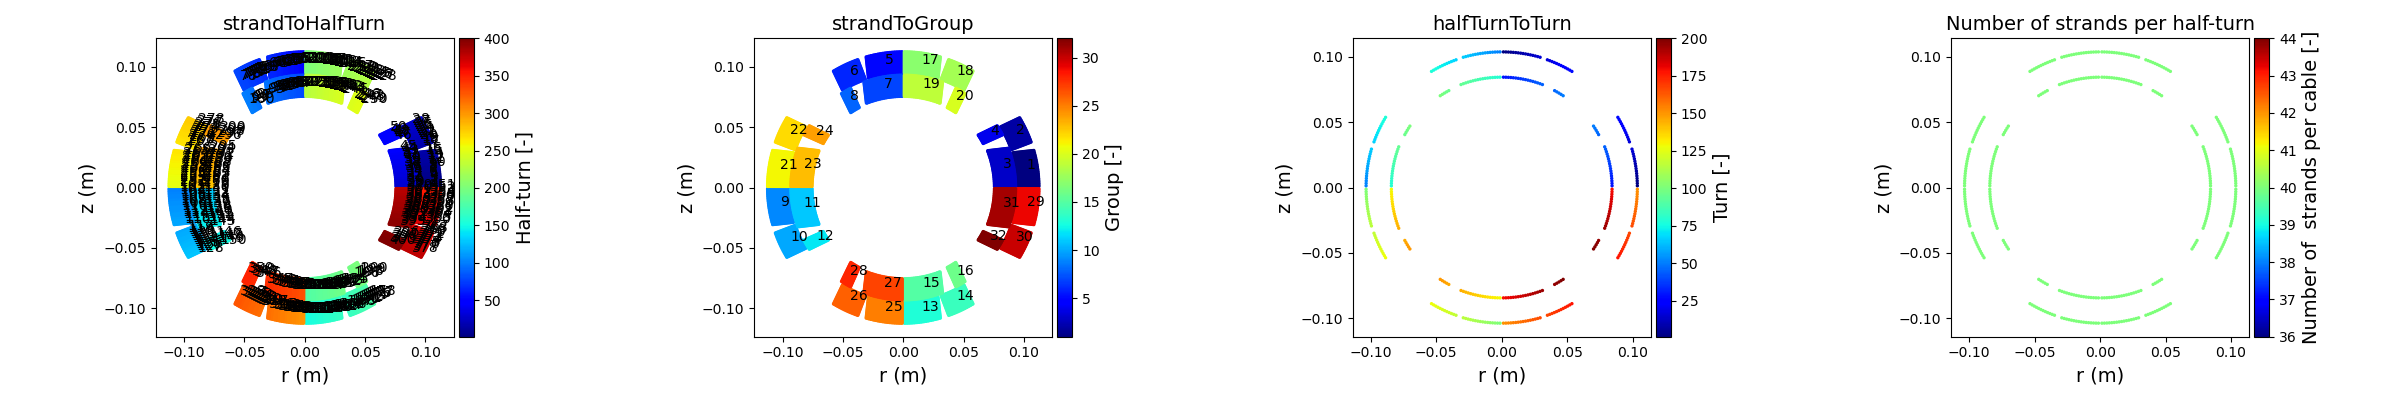

Reading  9  Field maps. This may take a while.
Field maps: 100%|██████████| 9/9 [01:35<00:00, 10.61s/it]


<IPython.core.display.Javascript object>


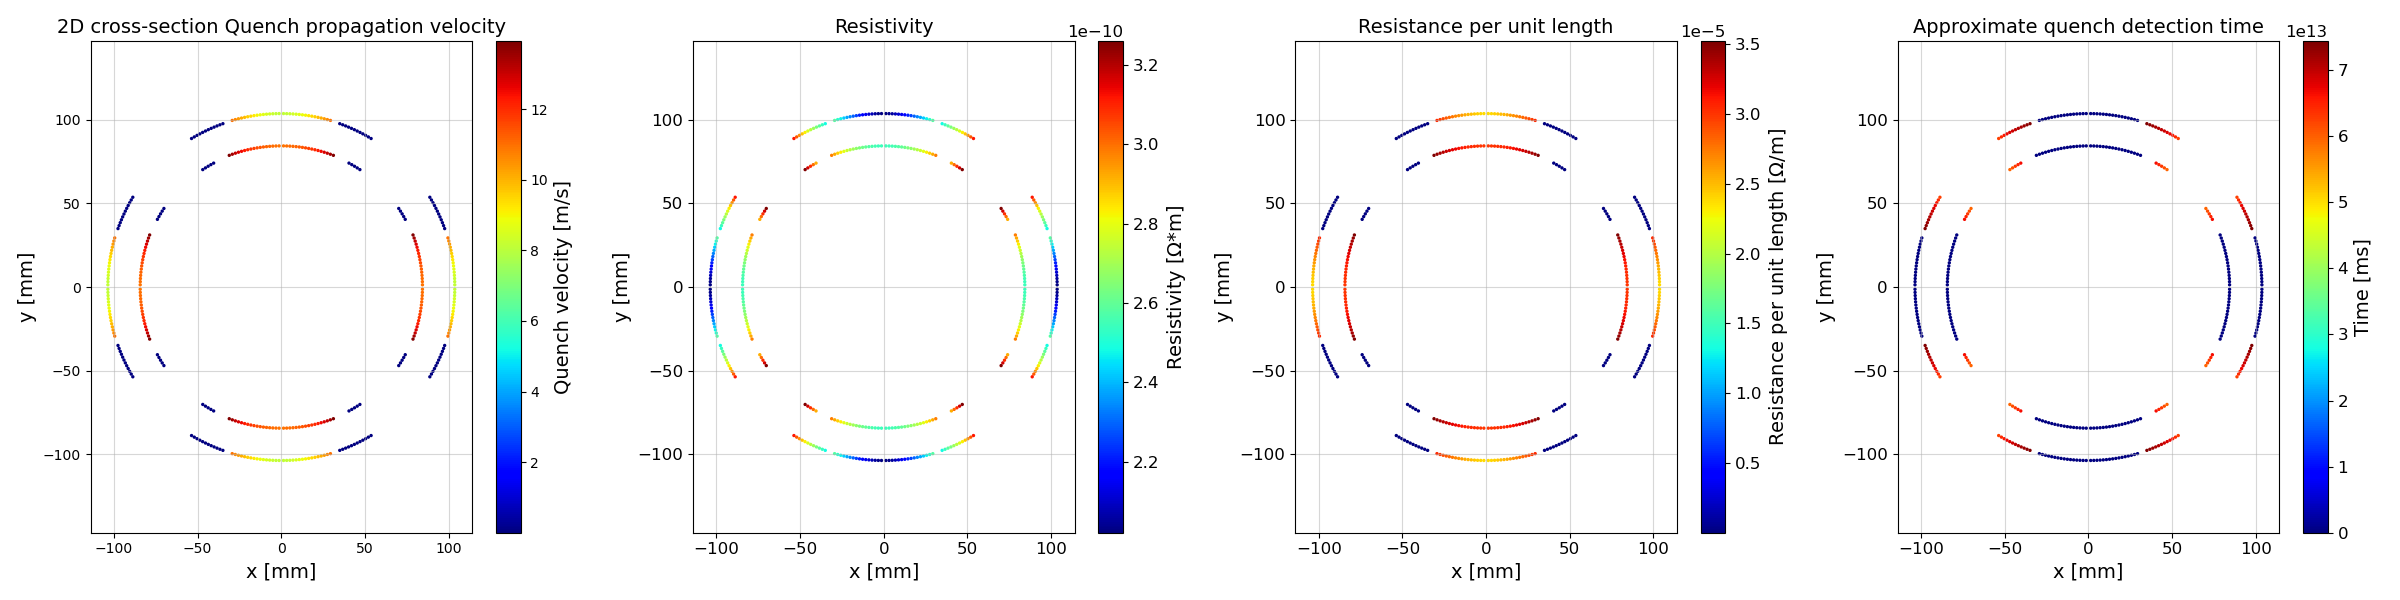

<IPython.core.display.Javascript object>


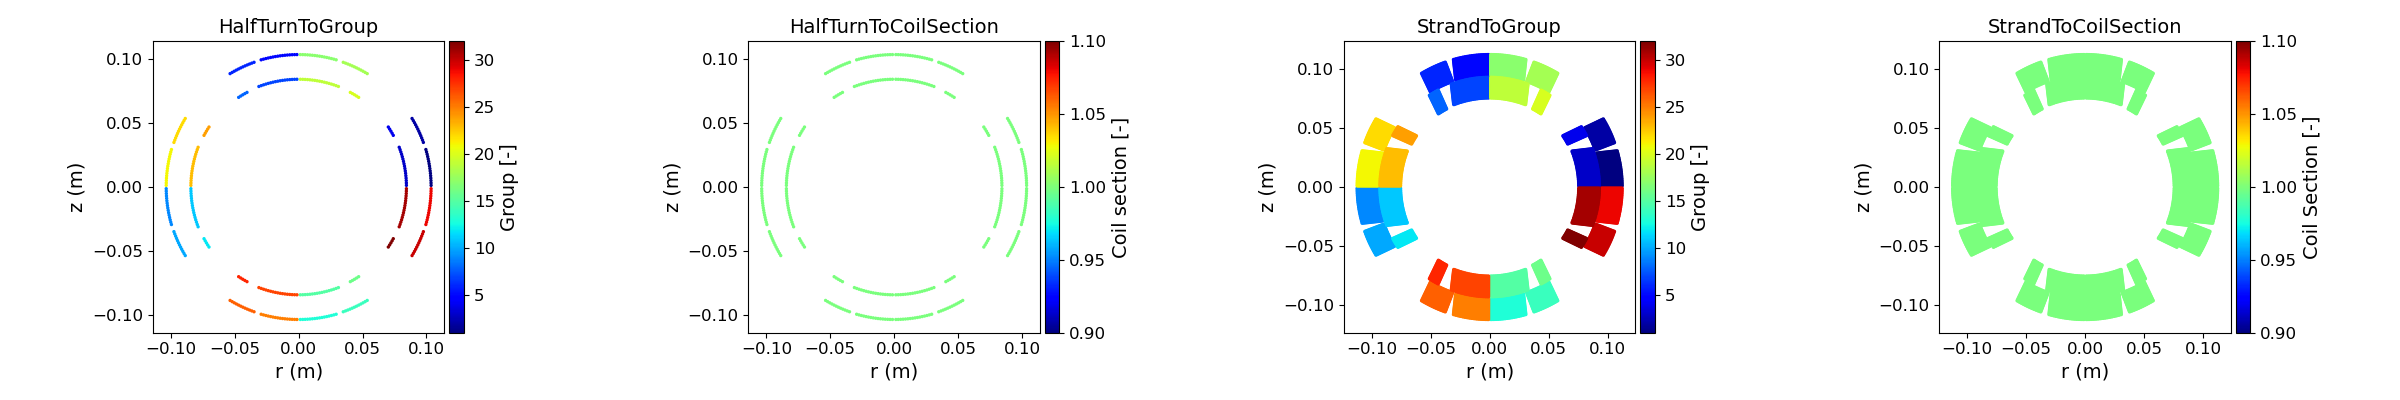

<IPython.core.display.Javascript object>


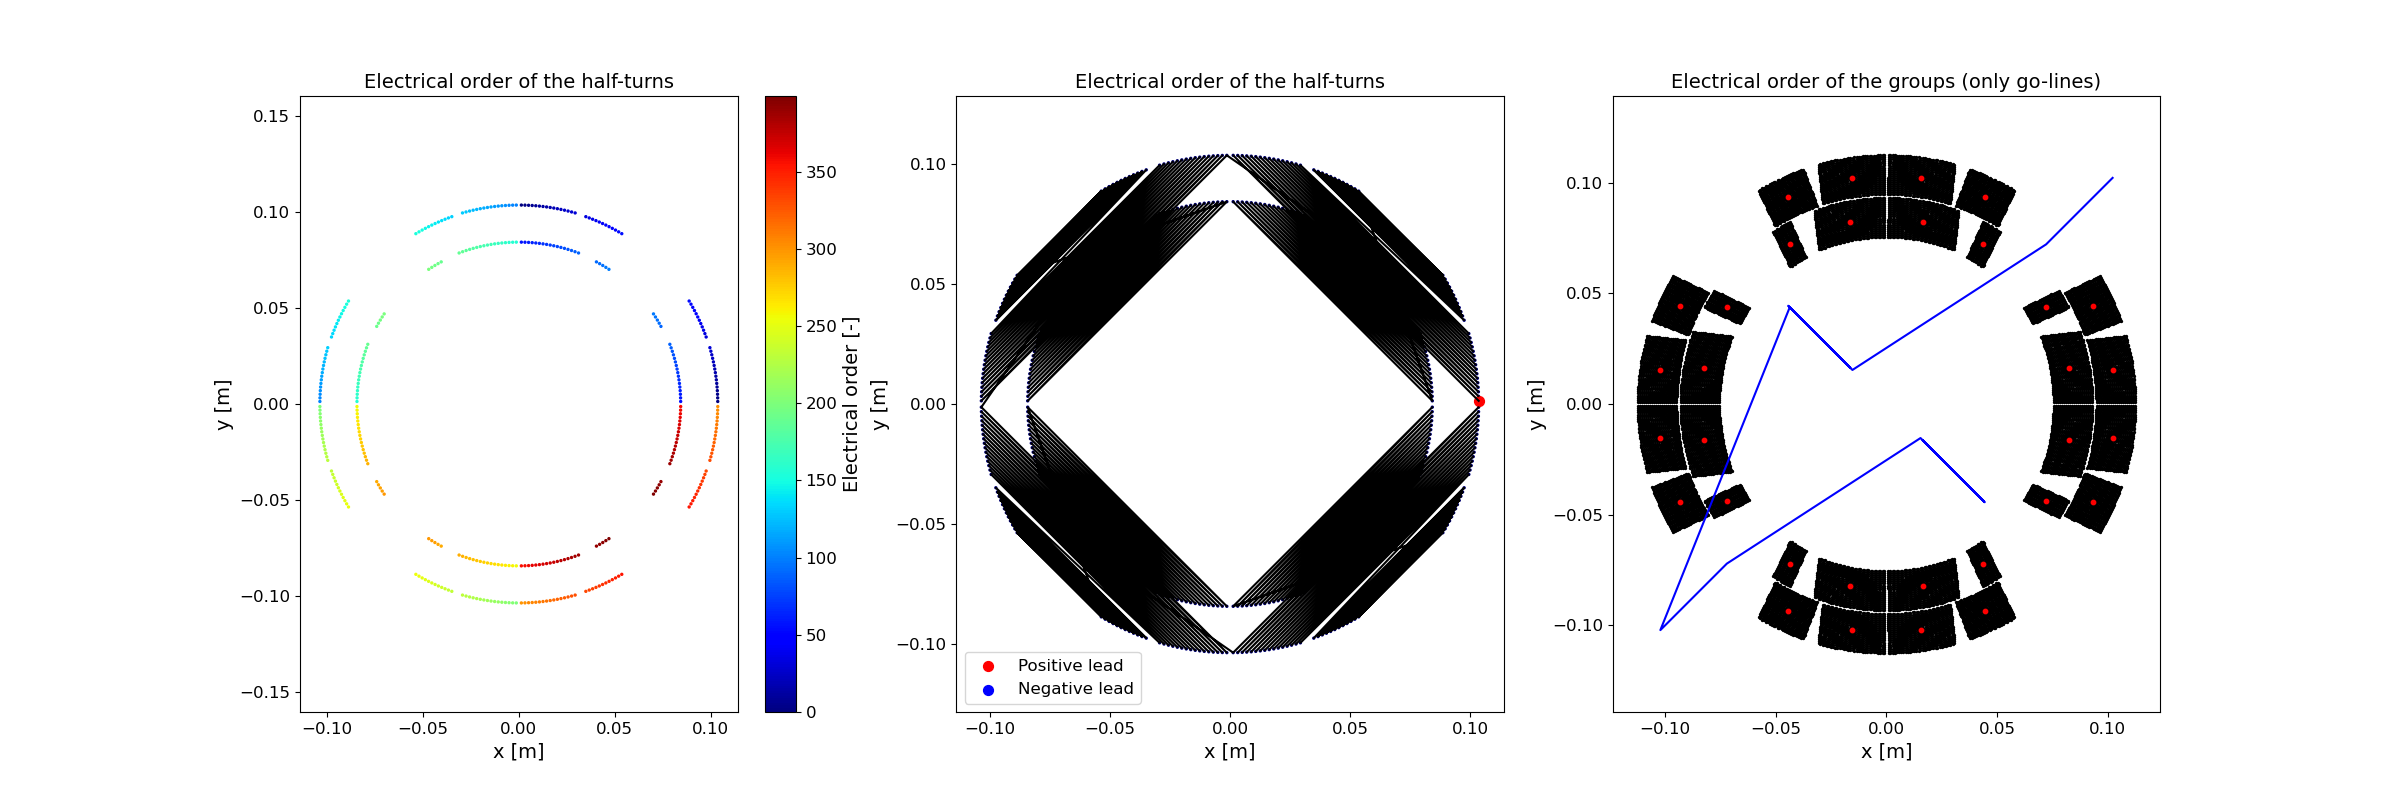

<IPython.core.display.Javascript object>


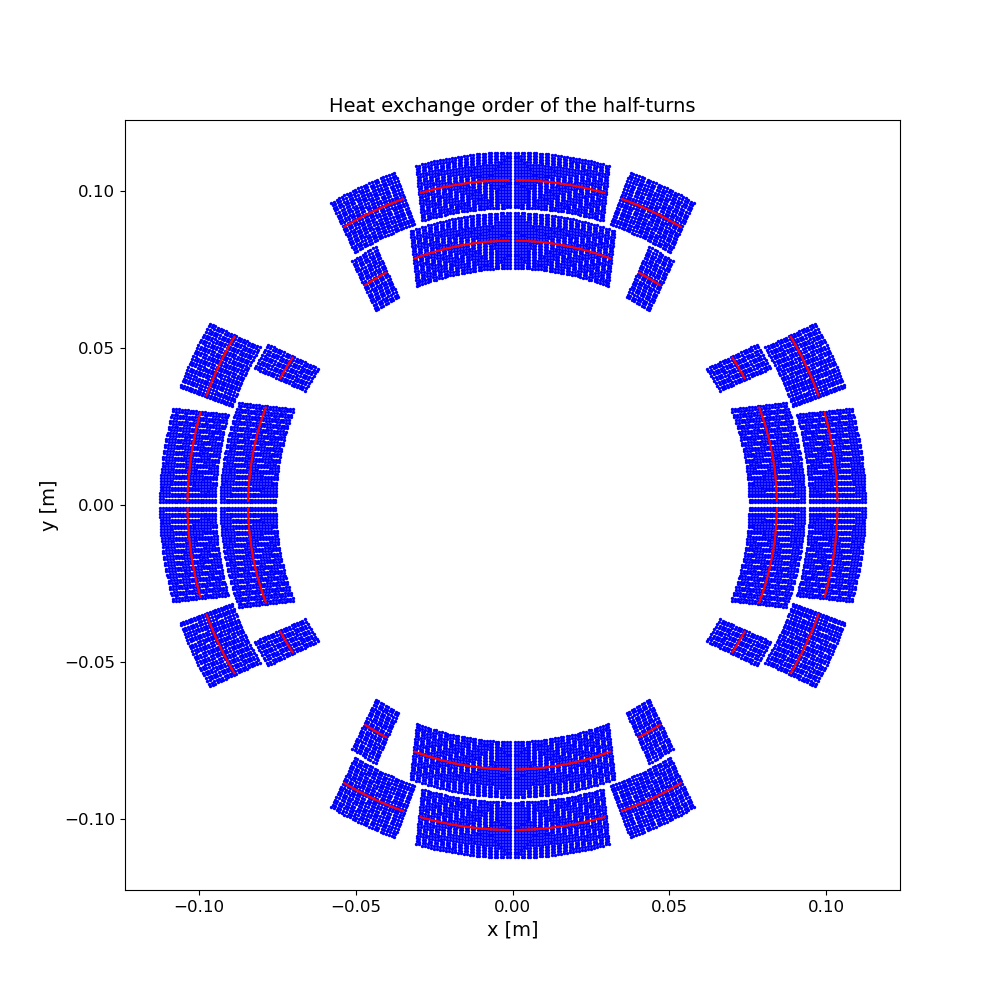

<IPython.core.display.Javascript object>


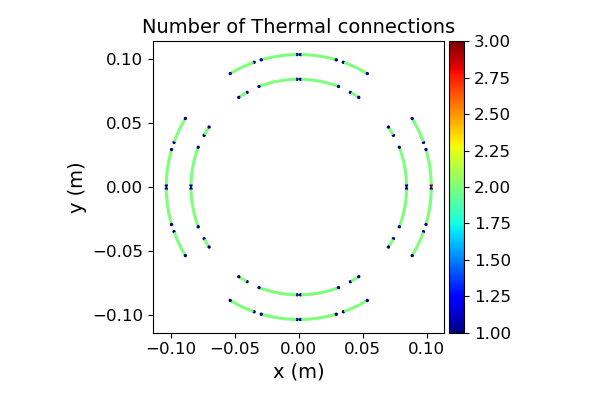

<IPython.core.display.Javascript object>


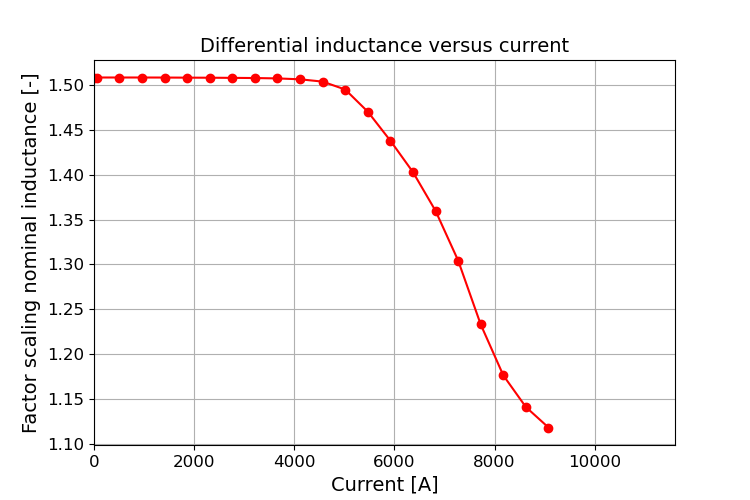

<IPython.core.display.Javascript object>


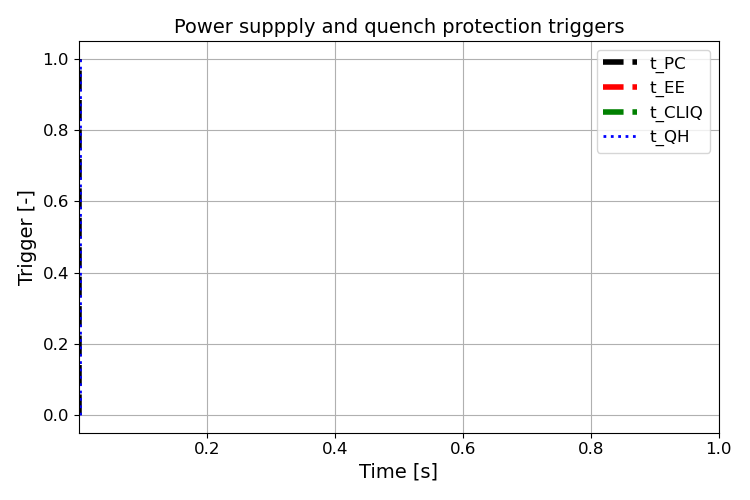

<IPython.core.display.Javascript object>


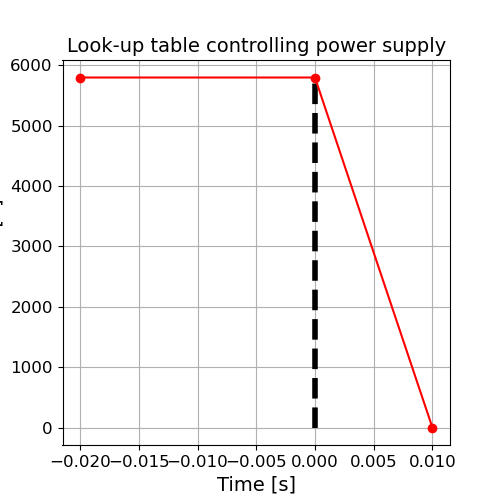

In [19]:
new_notebook.plot_all()